# Instalar Librerias

In [9]:
pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python mediapipe sklearn matplotlib

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tensorflow==2.4.1 (from versions: 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0)
ERROR: No matching distribution found for tensorflow==2.4.1

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


- tensorflow==2.4.1: Una biblioteca para cálculos numéricos y aprendizaje automático que permite la construcción y entrenamiento de modelos de redes neuronales.
- tensorflow-gpu==2.4.1: La misma biblioteca que TensorFlow, pero optimizada para usar con GPUs NVIDIA, lo que permite un entrenamiento y procesamiento más rápido de los modelos de aprendizaje automático.
- opencv-python: Una biblioteca de Python para visión por computadora y procesamiento de imágenes.
- mediapipe: Una biblioteca para el procesamiento de flujos de datos multimedia, que incluye herramientas para visión por computadora y aprendizaje automático.
- sklearn: Es el nombre común para scikit-learn, una biblioteca para aprendizaje automático que proporciona herramientas para análisis de datos y modelado estadístico.
- matplotlib: Una biblioteca de trazado gráfico 2D que produce figuras de calidad de publicación en una variedad de formatos impresos y entornos interactivos en todas las plataformas.

# Librerias Necesarias

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

- cv2: Este es el módulo de OpenCV para Python, que proporciona herramientas para el procesamiento de imágenes y visión por computadora.
- numpy: Una biblioteca fundamental para la computación científica en Python. Proporciona un objeto de matriz multidimensional de alto rendimiento y herramientas para trabajar con estas matrices.
- os: Este módulo proporciona una forma portátil de utilizar la funcionalidad dependiente del sistema operativo, como leer o escribir en el sistema de archivos.
- pyplot de matplotlib: Es una colección de funciones que hacen que matplotlib funcione como MATLAB. Cada función de pyplot realiza algún cambio en una figura: por ejemplo, crea una figura, crea un área de trazado en una figura, traza algunas líneas en un área de trazado, decora el trazado con etiquetas, etc.
- time: Este módulo proporciona varias funciones relacionadas con el tiempo, como esperar durante un número específico de segundos.
- mediapipe: Una biblioteca para el procesamiento de flujos de datos multimedia, que facilita la construcción de pipelines para la entrada, procesamiento y salida de datos multimedia.

# Preparación de puntos

In [2]:
# Establezco 'mp_holistic' como mi módulo holístico de MediaPipe para que pueda acceder a sus funciones.
mp_holistic = mp.solutions.holistic
# Establezco 'mp_drawing' como mi módulo de utilidades de dibujo de MediaPipe para que pueda usarlo para dibujar las marcas de referencia en mis imágenes.
mp_drawing = mp.solutions.drawing_utils

- El modelo holístico de MediaPipe es capaz de detectar y rastrear poses, manos y caras simultáneamente. Esta línea te permite acceder a las funciones y modelos del módulo holistic de manera más cómoda.
- mp_drawing. Este módulo contiene utilidades para dibujar las detecciones de MediaPipe en imágenes. Por ejemplo, si detectas las manos en una imagen, puedes utilizar este módulo para dibujar los puntos de referencia de la mano en la imagen.


In [3]:
def mediapipe_detection(image, model):
    # Primero, convierto mi imagen de BGR (formato de OpenCV) a RGB porque MediaPipe así lo requiere.
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # Luego, hago mi imagen no modificable para mejorar el rendimiento durante el procesamiento del modelo.
    image.flags.writeable = False
    # Proceso mi imagen con el modelo dado
    results = model.process(image)
    # Ahora que he terminado el procesamiento, hago mi imagen modificable nuevamente.
    image.flags.writeable = True
    # Convierto mi imagen de vuelta a BGR para poder trabajar con ella en OpenCV después.
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    # Devuelvo tanto mi imagen (ahora en BGR nuevamente) como los resultados del procesamiento del modelo.
    return image, results


In [4]:
def draw_landmarks(image, results):
    # Dibujo las conexiones de la malla de mi rostro si están disponibles.
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS)
    # Dibujo las conexiones de mi pose corporal si están disponibles.
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    # Dibujo las conexiones de mi mano izquierda si están disponibles.
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    # Dibujo las conexiones de mi mano derecha si están disponibles.
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)


Esta función es muy útil porque me permite procesar cualquier imagen con cualquier modelo de MediaPipe de manera eficiente y sencilla. La uso para asegurarme de que mis imágenes están en el formato correcto antes y después del procesamiento, y para obtener los resultados de la detección o seguimiento que necesito para mi aplicación.

In [5]:
def draw_styled_landmarks(image, results):
    # Dibujo las conexiones de mi rostro con colores y grosores específicos.
    mp_drawing.draw_landmarks(
        image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
        mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
        mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
    ) 
    # Dibujo las conexiones de mi pose con otro conjunto de colores y grosores.
    mp_drawing.draw_landmarks(
        image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
        mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
        mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
    ) 
    # Para mi mano izquierda, elijo colores y grosores que me gustan, para diferenciarla visualmente.
    mp_drawing.draw_landmarks(
        image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
        mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
        mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
    ) 
    # Y hago lo mismo para mi mano derecha, utilizando una paleta de colores distinta para distinguirla fácilmente.
    mp_drawing.draw_landmarks(
        image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
        mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
        mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
    ) 

En esta función, uso la DrawingSpec para personalizar cómo se dibujan las marcas de referencia y sus conexiones. Por cada tipo de marca (cara, pose, mano izquierda, mano derecha), especifico colores y grosores diferentes:
- Color: Lo defino usando una tupla de tres valores que representan el color en el espacio RGB (Rojo, Verde, Azul).
- Thickness: Especifico el grosor de las líneas que conectan las marcas de referencia.
- Circle_radius: Defino el tamaño de los círculos que representan las marcas de referencia.

In [7]:
# Inicio capturando video de mi cámara web.
cap = cv2.VideoCapture(0)
# Configuro el modelo de MediaPipe Holistic con un cierto nivel de confianza mínimo para la detección y el seguimiento.
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    # Mantengo el bucle mientras mi cámara esté activa.
    while cap.isOpened():
        # Leo los frames de mi cámara web.
        ret, frame = cap.read()
        # Si logro leer un frame correctamente, procedo con las detecciones.
        if ret:
            # Realizo detecciones en el frame actual.
            image, results = mediapipe_detection(frame, holistic)
            print(results)  # Imprimo los resultados para depuración.
            # Dibujo las marcas de referencia detectadas en el frame.
            draw_styled_landmarks(image, results)
            # Muestro el frame procesado en una ventana.
            cv2.imshow('OpenCV Feed', image)
            # Espero una tecla para salir del bucle. Si presiono 'q', termino el bucle.
            if cv2.waitKey(10) & 0xFF == ord('q'):
                break
    # Libero la cámara y cierro todas las ventanas abiertas al finalizar.
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

Este código me permite ver en tiempo real cómo el modelo Holistic de MediaPipe detecta y sigue mi postura, las características de mi cara y las posiciones de mis manos. Utilizo las funciones mediapipe_detection para procesar los frames capturados y draw_styled_landmarks para visualizar las detecciones con estilos personalizados.

Al ejecutar este script, se abrirá una ventana que muestra el video capturado por mi cámara web, junto con las marcas de referencia de la postura, la cara y las manos dibujadas sobre mí en tiempo real. Puedo cerrar esta ventana y terminar el script presionando la tecla 'q'.

In [8]:
# Verificar y mostrar información sobre la detección de la cara
if results.face_landmarks:
    print(f"Se detectó la cara con {len(results.face_landmarks.landmark)} puntos de referencia.")
else:
    print("No se detectó la cara en este frame.")
# Verificar y mostrar información sobre la detección de la mano izquierda
if results.left_hand_landmarks:
    print(f"Se detectó la mano izquierda con {len(results.left_hand_landmarks.landmark)} puntos de referencia.")
else:
    print("No se detectó la mano izquierda en este frame.")
# Verificar y mostrar información sobre la detección de la mano derecha
if results.right_hand_landmarks:
    print(f"Se detectó la mano derecha con {len(results.right_hand_landmarks.landmark)} puntos de referencia.")
else:
    print("No se detectó la mano derecha en este frame.")
# Verificar y mostrar información sobre la detección de la pose
if results.pose_landmarks:
    print(f"Se detectaron puntos de referencia de la pose con {len(results.pose_landmarks.landmark)} puntos de referencia.")
else:
    print("No se detectaron puntos de referencia de la pose en este frame.")

Se detectó la cara con 468 puntos de referencia.
Se detectó la mano izquierda con 21 puntos de referencia.
No se detectó la mano derecha en este frame.
Se detectaron puntos de referencia de la pose con 33 puntos de referencia.


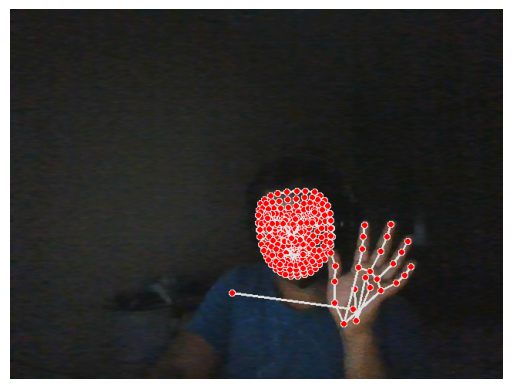

In [10]:
draw_landmarks(frame, results)  # Dibuja las marcas de referencia en el frame
# Convierte el frame de BGR a RGB
frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
# Usa matplotlib para mostrar la imagen
plt.imshow(frame_rgb)
plt.axis('off')  # Opcional: oculta los ejes para una visualización más limpia
plt.show()

# Preparación de Extracción de los puntos de los frames

In [18]:
# Inicio con una lista vacía para almacenar los puntos de referencia de la pose
pose = []
# Itero sobre cada punto de referencia en los resultados de la pose
for res in results.pose_landmarks.landmark:
    # Para cada punto de referencia, creo un arreglo de NumPy con sus coordenadas X, Y, Z y el valor de visibilidad
    # La visibilidad indica qué tan probable es que el punto de referencia sea visible (no ocluido) en la imagen
    test = np.array([res.x, res.y, res.z, res.visibility])
    # Agrego el arreglo de NumPy a mi lista 'pose'
    pose.append(test)
# Ahora, 'pose' contiene un arreglo de NumPy para cada punto de referencia de la pose detectada
# Cada arreglo tiene las coordenadas X, Y, Z del punto y su valor de visibilidad


Este código asume que ya has procesado una imagen o un frame con el modelo Holistic de MediaPipe y tienes los resultados almacenados en results. La lista pose se llena con arreglos de NumPy, cada uno representando un punto de referencia de la pose detectada, incluyendo sus coordenadas en el espacio y un valor que indica la probabilidad de que cada punto sea visible en la imagen.

Este enfoque te permite tener una representación numérica precisa de la pose detectada, facilitando el análisis posterior, la visualización o incluso el uso de estos datos para entrenar modelos de aprendizaje automático o realizar cálculos adicionales.

In [19]:
# Transformo las coordenadas de los puntos de referencia de la pose en un arreglo de NumPy y lo aplano.
# Si no se detectan puntos de referencia de la pose, genero un arreglo de ceros de tamaño adecuado.
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() \
    if results.pose_landmarks else np.zeros(132)  # 33 puntos * 4 atributos (X, Y, Z, visibilidad)

# Hago lo mismo para los puntos de referencia de la cara, pero solo incluyo las coordenadas X, Y, Z.
# Aplano el arreglo resultante, y si no hay detecciones, genero un arreglo de ceros de longitud adecuada.
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() \
    if results.face_landmarks else np.zeros(1404)  # 468 puntos * 3 atributos (X, Y, Z)

# Para la mano izquierda, creo un arreglo de NumPy con las coordenadas X, Y, Z de cada punto detectado y lo aplano.
# Genero un arreglo de ceros de longitud adecuada si no se detecta la mano izquierda.
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() \
    if results.left_hand_landmarks else np.zeros(21*3)  # 21 puntos * 3 atributos (X, Y, Z)

# Repito el proceso para la mano derecha, generando un arreglo aplanado de las coordenadas de los puntos de referencia.
# Si no se detecta la mano derecha, genero un arreglo de ceros de la misma longitud que para la mano izquierda.
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() \
    if results.right_hand_landmarks else np.zeros(21*3)  # 21 puntos * 3 atributos (X, Y, Z)

La decisión de incluir el valor de visibilidad solo para la pose y no para la cara o las manos refleja las diferencias en cómo se utilizan estas detecciones en aplicaciones prácticas y los desafíos únicos que presenta cada tipo de detección. Esto demuestra la importancia de adaptar el procesamiento de datos y las características utilizadas a las especificidades de cada tipo de modelo y las necesidades de la aplicación final.

In [11]:
def extract_keypoints(results):
    # Extraigo los puntos de referencia de la pose y los aplano en un solo vector.
    # Si no se detectan puntos de la pose, genero un vector de ceros de tamaño 33*4.
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() \
        if results.pose_landmarks else np.zeros(33*4)
    # Hago lo mismo para los puntos de referencia de la cara, pero sin incluir el valor de visibilidad,
    # ya que el modelo de la cara no lo proporciona. Genero un vector de ceros de tamaño 468*3 si no se detecta la cara.
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() \
        if results.face_landmarks else np.zeros(468*3)
    # Para la mano izquierda, extraigo los puntos de referencia y los aplano en un vector.
    # Genero un vector de ceros de tamaño 21*3 si no se detecta la mano izquierda.
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() \
        if results.left_hand_landmarks else np.zeros(21*3)
    # Repito el proceso para la mano derecha, generando un vector de ceros de tamaño 21*3 si no se detecta.
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() \
        if results.right_hand_landmarks else np.zeros(21*3)
    # Concateno todos los vectores extraídos en un solo vector que contiene toda la información de los puntos clave.
    return np.concatenate([pose, face, lh, rh])

Esta función me permite organizar y preparar los datos de manera eficiente para su posterior análisis o uso en aplicaciones de aprendizaje automático. Al aplanar y concatenar los puntos clave de diferentes partes del cuerpo, facilito el manejo de los datos y hago posible el uso de este único vector de características para tareas como la clasificación de actividades o el reconocimiento de gestos. Además, al proporcionar vectores de ceros para las partes del cuerpo no detectadas, mantengo la consistencia en la longitud del vector de características, lo cual es crucial para muchos algoritmos de aprendizaje automático que requieren una entrada de tamaño fijo.

In [12]:
result_test = extract_keypoints(results)
result_test

array([ 0.5707227 ,  0.62046599, -0.58471966, ...,  0.        ,
        0.        ,  0.        ])

In [13]:
np.save('0', result_test)
np.load('0.npy')

array([ 0.5707227 ,  0.62046599, -0.58471966, ...,  0.        ,
        0.        ,  0.        ])

# Preparación de la creación de la Base de datos

In [29]:
# Establezco la ruta al directorio donde se exportarán y almacenarán los datos.
DATA_PATH = os.path.join('LSP_Data') 
# Defino una lista de numeros en LSP que el sistema intentará detectar.
actions = np.array(['0','1', '2', '3', '4', '5', '6', '7', '8', '9','10'])
# Indico la cantidad de secuencias (videos) que quiero capturar para cada acción.
# En este caso, planeo capturar 30 videos para cada una de las acciones listadas en la variable 'actions'.
no_sequences = 30
# Establezco la longitud de las secuencias, es decir, cuántos frames (fotogramas) tendrá cada video.
# Aquí, cada video tendrá 30 frames. Esto es importante para asegurarse de que todos los videos tengan una longitud uniforme,
# lo cual es típicamente necesario para el entrenamiento de modelos de aprendizaje automático.
sequence_length = 30

In [30]:
# Crear directorios para almacenar los datos de los videos
for action in actions: 
    for sequence in range(no_sequences):
        os.makedirs(os.path.join(DATA_PATH, action, str(sequence)), exist_ok=True)

In [ ]:
# Iniciar captura de video
cap = cv2.VideoCapture(0)
# Configurar modelo de MediaPipe Holistic
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    # Bucle principal para capturar y procesar cada acción y secuencia
    for action in actions:
        for sequence in range(no_sequences):
            for frame_num in range(sequence_length):
                ret, frame = cap.read()
                if not ret:
                    continue
                image, results = mediapipe_detection(frame, holistic)
                draw_styled_landmarks(image, results)
                if frame_num == 0: 
                    # Dar tiempo al usuario para prepararse antes de empezar la colección
                    cv2.putText(image, f'INICIANDO LA RECOLECCIÓN PARA EL NUMERO {action} EL NUMERO DEL FRAME ES {sequence}', (15,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 1, cv2.LINE_AA)
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, f'RECOLENTANDO PARA EL NUMERO {action} EL NUMERO DEL FRAME ES {sequence}', (15,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 1, cv2.LINE_AA)
                    cv2.imshow('OpenCV Feed', image)
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
    cap.release()
    cv2.destroyAllWindows()

In [31]:
import cv2
import mediapipe as mp

mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands

# Inicializa MediaPipe Hands
hands = mp_hands.Hands(static_image_mode=False, max_num_hands=1, min_detection_confidence=0.5, min_tracking_confidence=0.5)

# Captura de video
cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        continue

    # Aplica MediaPipe para detectar las manos
    results = hands.process(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

    # Crea un lienzo para dibujar el avatar
    avatar_frame = np.zeros(frame.shape, dtype=np.uint8)

    # Dibuja los landmarks de la mano
    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            mp_drawing.draw_landmarks(avatar_frame, hand_landmarks, mp_hands.HAND_CONNECTIONS)

    # Muestra el avatar en una ventana
    cv2.imshow('Hand Gestures Avatar', avatar_frame)

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


In [1]:
import tkinter

In [3]:
ventana = tkinter.Tk()
ventana.geometry("4000 x300")

def saludo():
  print

ventana.mainloop()

TclError: bad geometry specifier "4000 x300"

In [ ]:
import tkinter as tk
import numpy as np
import cv2
from PIL import Image, ImageTk

# Suponiendo que tienes una función para cargar los keypoints y otra para dibujar el avatar
def load_keypoints(number):
    # Cargar los keypoints del archivo .npy para el número dado
    return np.load(f'keypoints_{number}.npy')

def draw_avatar(keypoints):
    # Dibuja el avatar basado en keypoints
    # Retorna una imagen PIL o ImageTk para mostrar en la GUI
    pass

# Crear la ventana principal de la GUI
root = tk.Tk()

# Función para manejar la lógica de "Traducir"
def translate_number():
    # Aquí va la lógica para obtener el número seleccionado
    selected_number = ...
    keypoints = load_keypoints(selected_number)
    avatar_image = draw_avatar(keypoints)
    avatar_label.config(image=avatar_image)
    avatar_label.image = avatar_image  # Mantener una referencia

# Añadir botones para números y "Traducir"
for number in range(11):
    btn = tk.Button(root, text=str(number), command=lambda n=number: translate_number(n))
    btn.pack(side=tk.LEFT)

# Botón para "Traducir"
translate_btn = tk.Button(root, text="Traducir", command=translate_number)
translate_btn.pack(side=tk.LEFT)

# Etiqueta para mostrar el avatar
avatar_label = tk.Label(root)
avatar_label.pack(side=tk.LEFT)

# Iniciar el bucle de eventos de la GUI
root.mainloop()
